In [1]:
import pynamical
from pynamical import simulate, bifurcation_plot, save_fig
import pandas as pd, numpy as np, IPython.display as display, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline

In [2]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

In [3]:
pops = simulate(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=7)
pops.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,1.0,1.5,2.0,2.5,3.0,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.250,0.375,0.500,0.625,0.750,0.875
2,0.055,0.188,0.352,0.500,0.586,0.562,0.383
3,0.026,0.152,0.342,0.500,0.607,0.738,0.827
4,0.013,0.129,0.338,0.500,0.597,0.580,0.501
5,0.006,0.112,0.335,0.500,0.602,0.731,0.875
6,0.003,0.100,0.334,0.500,0.599,0.590,0.383
7,0.002,0.090,0.334,0.500,0.600,0.726,0.827
8,0.001,0.082,0.334,0.500,0.600,0.597,0.501
9,0.000,0.075,0.333,0.500,0.600,0.722,0.875


In [4]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(g, r, b, alpha) for g, r, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

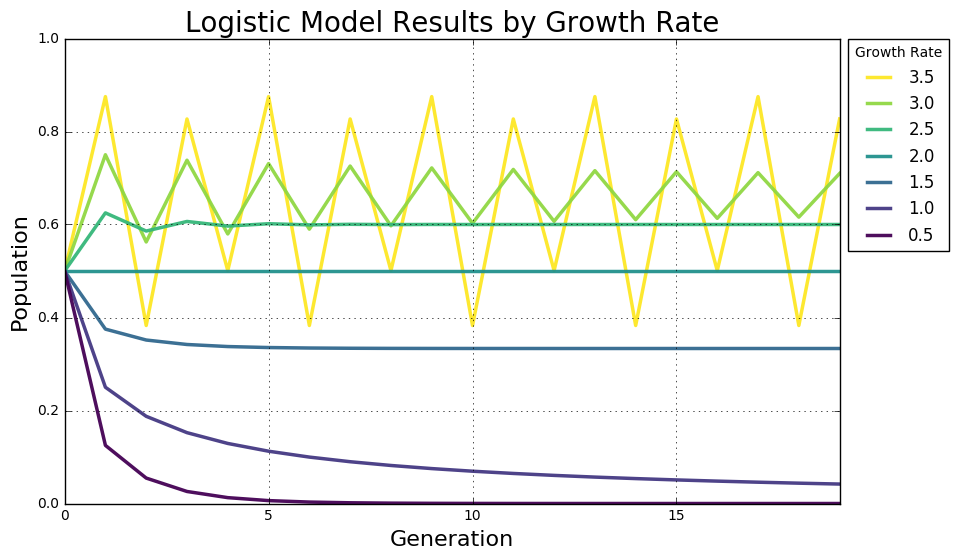

In [5]:
color_list = get_colors('viridis', n=len(pops.columns), start=0., stop=1)
for color, rate in reversed(list(zip(color_list, pops.columns))):
    ax = pops[rate].plot(kind='line', figsize=[10, 6], linewidth=2.5, alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)

save_fig('logistic-map-growth-rates')
plt.show()

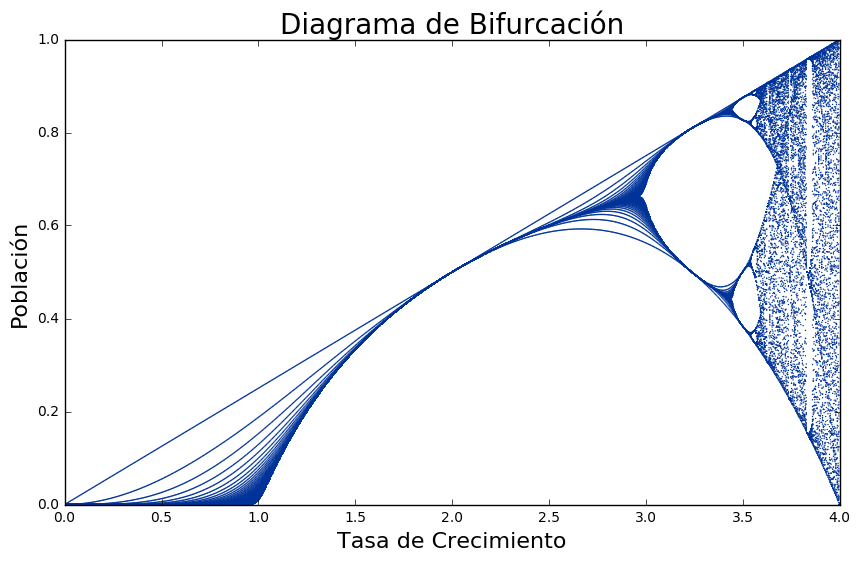

In [11]:
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=1)
bifurcation_plot(pops, filename='01', xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

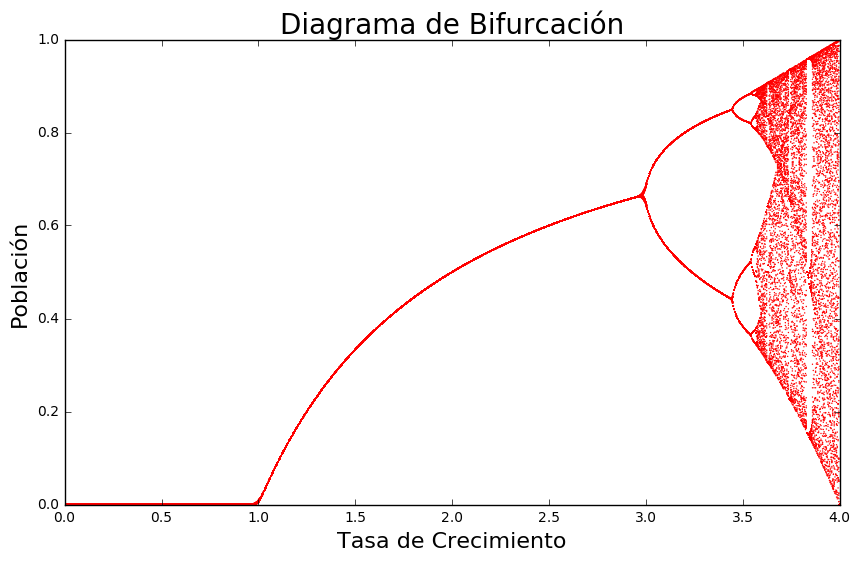

In [10]:
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, filename='02', color="r",xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

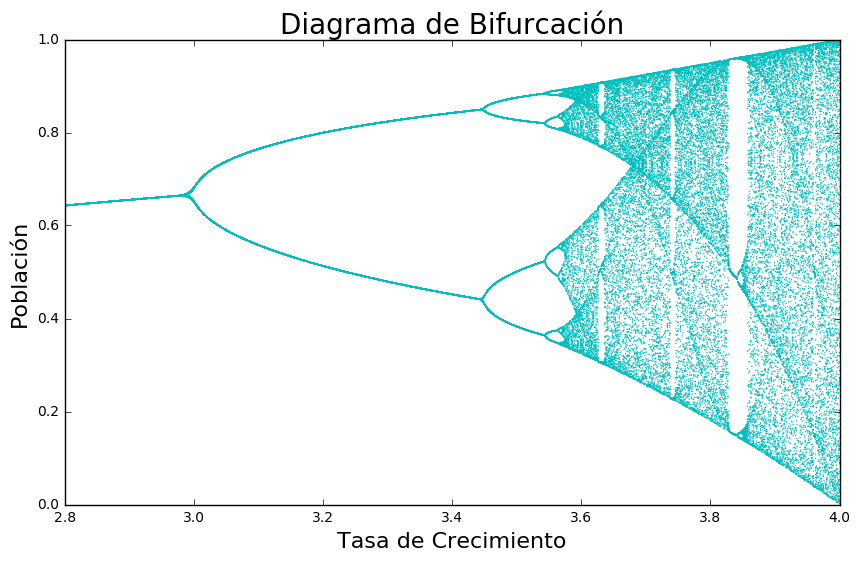

In [13]:
pops = simulate(num_gens=100, rate_min=2.8, rate_max=4, num_rates=1000, num_discard=200, initial_pop=0.1)
bifurcation_plot(pops, xmin=2.8, xmax=4, filename='03', color='c', xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

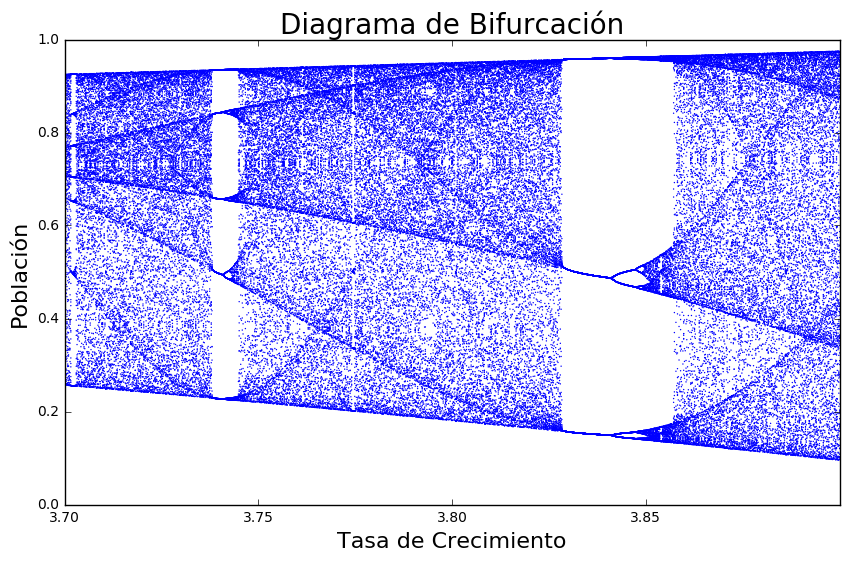

In [14]:
pops = simulate(num_gens=100, rate_min=3.7, rate_max=3.9, num_rates=1000, num_discard=100)
bifurcation_plot(pops, xmin=3.7, xmax=3.9, filename='04',color="b",xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

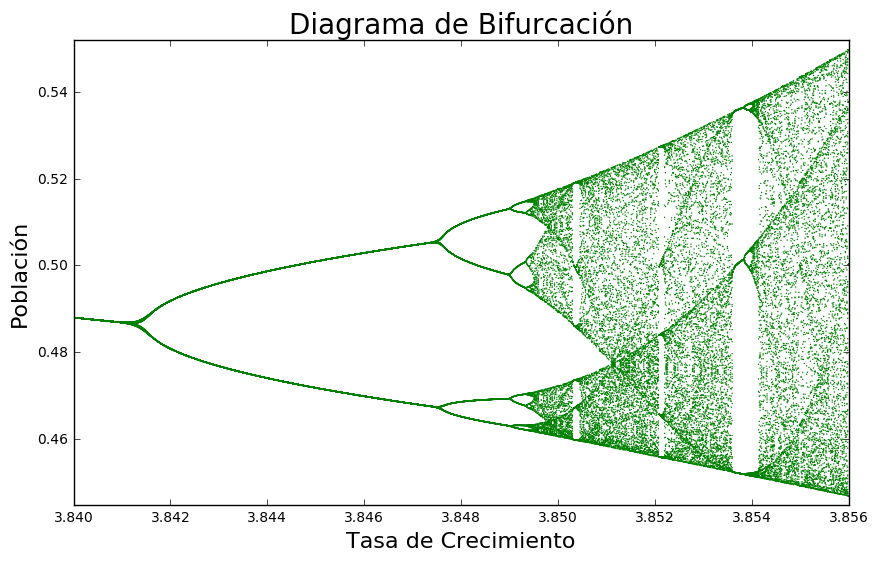

In [16]:
pops = simulate(num_gens=200, rate_min=3.84, rate_max=3.856, num_rates=1000, num_discard=300)
bifurcation_plot(pops, xmin=3.84, xmax=3.856, ymin=0.445, ymax=0.552, filename='05', color="g",xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

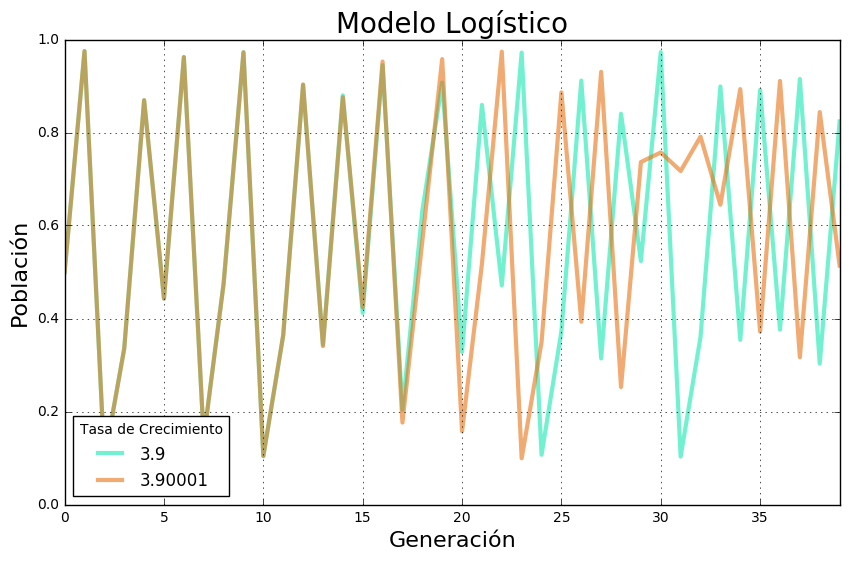

In [17]:
rate1 = 3.9
rate2 = rate1 + 0.00001

pops = simulate(num_gens=40, rate_min=rate1, rate_max=rate2, num_rates=2)
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#15e9b1','#e87212'])
ax.grid(True)
ax.set_title('Modelo Logístico', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Tasa de Crecimiento', loc=3)

save_fig('parametros-mapalogistico')
plt.show()

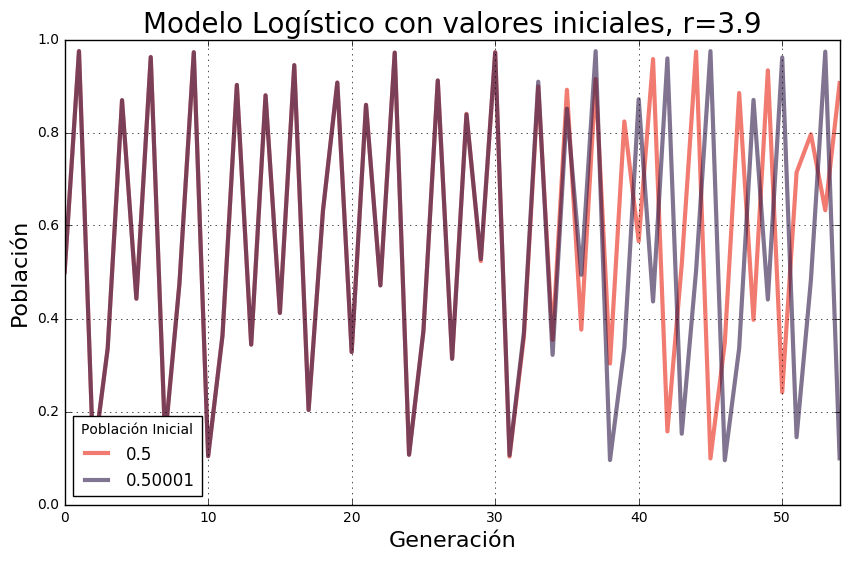

In [18]:
r = 3.9
pops1 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#e82412','#2d1747'])
ax.grid(True)
ax.set_title('Modelo Logístico con valores iniciales, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Población Inicial', loc=3)

save_fig('mapalogistico-valoresiniciales')
plt.show()

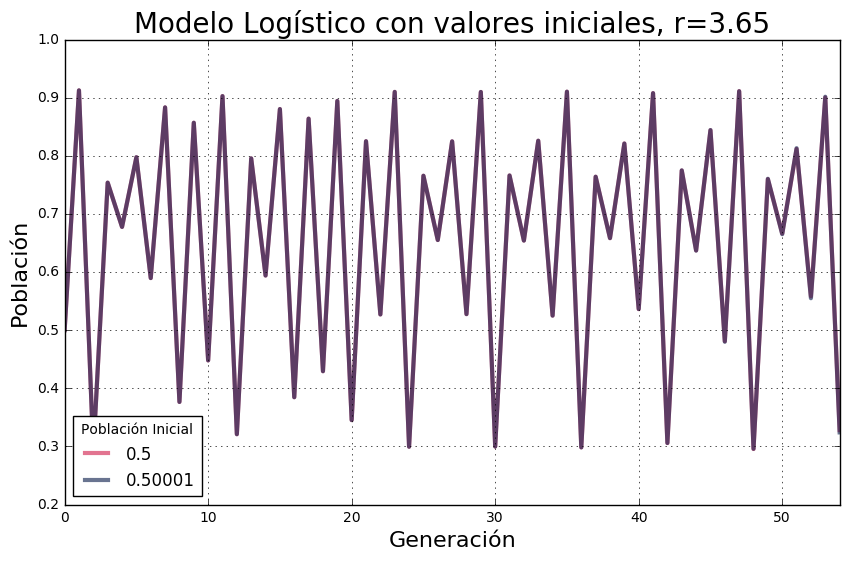

In [19]:
r = 3.65
pops1 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#d01747','#051747'])
ax.grid(True)
ax.set_title('Modelo Logístico con valores iniciales, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Población Inicial', loc=3)

save_fig('mapalogistico-condincialesestables')
plt.show()

In [ ]:
|